In [1]:
import os, sys
# for accessing src, stan, etc.
sys.path.append(os.path.abspath(os.path.join("../..")))

import numpy as np
import tensorflow as tf
from bayesflow.diagnostics import plot_recovery
from amortizer_point_estimate import amortizer, model, configurator_posterior

/Users/simonkucharsky/projects/bayesflow/amortized-mixture/.venv/lib/python3.11/site-packages/bayesflow/trainers.py:27: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm
INFO:root:Loaded loss history from checkpoints/amortizer_point_estimate/history_18.pkl.
INFO:root:Networks loaded from checkpoints/amortizer_point_estimate/ckpt-18
INFO:root:Performing a consistency check with provided components...
INFO:root:Done.


In [2]:
df = configurator_posterior(model(100))

In [3]:
estimates = amortizer.estimate(df)

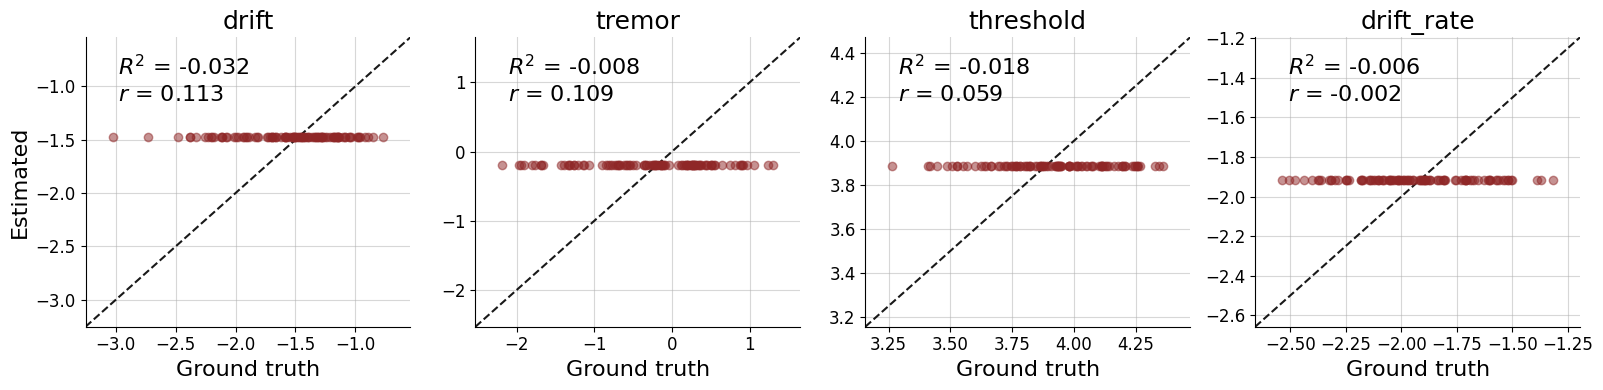

In [4]:
f = plot_recovery(
    estimates[:, None], df['parameters'], uncertainty_agg=lambda x, *args, **kwargs: tf.zeros_like(x)[:, 0],
    param_names=model.param_names[:4]
)